In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import json
import re


df1 = pd.read_csv('trump-tweets-raw(data-world).csv',encoding='Latin-1')
json_data = open("donald_data.json",'r')
df = pd.read_csv('Donald-Tweets!.csv',encoding='Latin-1')

In [2]:
def get_month(date):
    """
    Extract the month from the Date column and 
    then convert month from letter to digit.
    INPUT: date
    OUTPUT: month 
    """
    
    month = date.split()[1]
    
    for m, m_num in {'Jan': "01",
                     'Feb': "02",
                     'Mar': "03",
                     'Apr': "04",
                     'May': "05",
                     'Jun': "06",
                     'Jul': "07",
                     'Aug': "08",
                     'Sep': "09",
                     'Okt': "10",
                     'Nov': "11",
                     'Dec': "12"}.items():
        if month == m:
            return month.replace(m, m_num)            

def get_day(date):
    
    """
    Extract the day from the Date column 
    INPUT: date
    OUTPUT: day 
    """ 
    return date.split()[2]

def get_year(date):
    """
    Extract the month from the Date column 
    INPUT: date
    OUTPUT: year 
    """ 
    year = re.search("\S*$",date)
    return year.group(0)
    
def get_time(date):
    """
    Extract the time from the Date column 
    INPUT: date
    OUTPUT: time 
    """ 
    time = re.search("[0-9].:[0-9].:[0-9]*",date)
    return time.group(0)


twt_date = []
twt_text = []

for i in json_data:
    twt_date.append(json.loads(i)['created_at'])
    twt_text.append(json.loads(i)['full_text'])

df_json = pd.DataFrame({'Date': twt_date,
                   'Text': twt_text})

df_json['month'] = df_json.apply(lambda x: get_month(str(x['Date'])), axis=1)
df_json['day'] = df_json.apply(lambda x: get_day(str(x['Date'])), axis=1)
df_json['Year'] = df_json.apply(lambda x: get_year(str(x['Date'])), axis=1)
df_json['Time'] = df_json.apply(lambda x: get_time(str(x['Date'])), axis=1)
#df.drop(columns='Date')
df_json['Date'] = df_json['Year']+'-'+df_json['month']+'-'+df_json['day']

df_json_update = df_json[['Date','Time','Text','Year']]
df_json_update.head()

,Date,Time,Text,Year
0,2018-09-11,20:16:49,The safety of American people is my absolute h...,2018
1,2018-09-11,16:48:49,Small Business Optimism Soars to Highest Level...,2018
2,2018-09-11,15:32:28,#NeverForget #September11th \nhttps://t.co/l8W...,2018
3,2018-09-11,12:58:10,17 years since September 11th!,2018
4,2018-09-11,12:24:52,"Departing Washington, D.C. to attend a Flight ...",2018


In [3]:
df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [4]:
df[df['Date']=='16-08-08']

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
1140,16-08-08,23:18:42,"As Senator Clinton promised 200,000 jobs in Up...",text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,17785,7962,NaN,NaN
1141,16-08-08,22:45:33,Many people are saying that the Iranians kille...,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,34214,13469,NaN,NaN
1142,16-08-08,22:43:56,Thank you Newt! https://t.co/Acg0hMvrpr,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,25622,9019,NaN,NaN
1143,16-08-08,22:27:02,Thank you Congressman Steven Palazzo! https://...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,16813,6173,NaN,NaN
1144,16-08-08,22:24:09,Thank you Senator David Perdue!\nhttps://t.co/...,link,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,15824,6197,NaN,NaN
1145,16-08-08,22:20:31,Thank you @RepLouBarletta!\nhttps://t.co/bre8u...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13848,4721,NaN,NaN
1146,16-08-08,22:15:44,Thank you @NFIB- together we will #MakeAmerica...,text,NaN,MakeAmericaGreatAgain,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13526,4574,NaN,NaN
1147,16-08-08,22:12:21,Thank you! https://t.co/4p0hzpkVWF,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,12272,3654,NaN,NaN
1148,16-08-08,22:06:25,Thank you Alex! https://t.co/c2uIa7mndP,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13384,4291,NaN,NaN
1149,16-08-08,20:14:57,RT @NFIB: .@NFIB encouraged by @realDonaldTrum...,link,NaN,taxplan;smallbiz,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,8115,3356,NaN,NaN


In [5]:
df1.tail()

,id,source,text,created
2337,734938503541325825,Android,Much of the money I have raised for our vetera...,2016-05-24T02:46:08Z
2338,734936659851128832,Android,"While under no obligation to do so, I have rai...",2016-05-24T02:38:48Z
2339,734903156589645824,iPhone,Join me in California or Montana!\n5/25/16: An...,2016-05-24T00:25:41Z
2340,734892328637325312,Android,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23T23:42:39Z
2341,734742416494845952,Android,"In trade, military and EVERYTHING else, it wil...",2016-05-23T13:46:57Z


In [6]:
#Create two new columns for date and time 
import re
df1['Date'] = df1['created'].str.replace(r'T(\d\d):(\d\d):(\d\d)Z','')
df1['Time'] = df1['created'].str.replace(r'(\d\d\d\d)-(\d\d)-(\d\d)T','').str.replace(r'Z','')

In [7]:
#Remove uncessary columns 
columns = ['Type','Media_Type','Hashtags','Tweet_Id','Tweet_Url','twt_favourites_IS_THIS_LIKE_QUESTION_MARK','Retweets','Unnamed: 10','Unnamed: 11']
df = df.drop(columns,axis=1)
df.tail()


,Date,Time,Tweet_Text
7370,15-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...
7371,15-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...
7372,15-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...
7373,15-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se..."
7374,15-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...


In [8]:
columns = ['id','source','created']
df1 = df1.drop(columns,axis=1)
df1

,text,Date,Time
0,"The #AmazonWashingtonPost, sometimes referred ...",2017-06-28,13:06:14
1,Some of the Fake News Media likes to say that ...,2017-06-28,10:58:59
2,The failing @nytimes writes false story after ...,2017-06-28,10:49:22
3,I just finished a great meeting with the Repub...,2017-06-27,22:27:48
4,"With ZERO Democrats to help, and a failed, exp...",2017-06-27,22:22:55
...,...,...,...
2337,Much of the money I have raised for our vetera...,2016-05-24,02:46:08
2338,"While under no obligation to do so, I have rai...",2016-05-24,02:38:48
2339,Join me in California or Montana!\n5/25/16: An...,2016-05-24,00:25:41
2340,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23,23:42:39


In [9]:
#Update the year with 4-digit
df['Date'] = df['Date'].str.replace(r'^()','20')
df.tail()

,Date,Time,Tweet_Text
7370,2015-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...
7371,2015-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...
7372,2015-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...
7373,2015-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se..."
7374,2015-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...


In [10]:
#Rename & capatilize first letter of a column
df.rename(columns={'Tweet_Text':'Text'}, inplace=True)
df1.rename(columns={'text':'Text'}, inplace=True)

In [11]:
#Change column order 
#Change the time format from x:xx:xx to xx:xx:xx
#and merge the dataframe together 

df = df[['Text','Date','Time']]
df['Time'] = df['Time'].str.replace(r'^(\d):(\d\d):(\d\d)',r'0\1:\2:\3')


In [12]:
df.tail() #2016-11 2015-07
#df[df['Date'] == '2016-11-11']
df['Year'] = df.apply(lambda x: x['Date'].split('-')[0], axis=1)
df = df[['Date','Time','Text','Year']]
df.head()

,Date,Time,Text,Year
0,2016-11-11,15:26:37,Today we express our deepest gratitude to all ...,2016
1,2016-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,2016
2,2016-11-11,11:14:20,Love the fact that the small groups of protest...,2016
3,2016-11-11,02:19:44,Just had a very open and successful presidenti...,2016
4,2016-11-11,02:10:46,A fantastic day in D.C. Met with President Oba...,2016


In [13]:
df1.tail() #2017-06 2016-05
#df1[df1['Date'] == '2016-11-11']
df1 = df1[['Date','Time','Text']]
df1['Year'] = df1.apply(lambda x: x['Date'].split('-')[0], axis=1)
df1 = df1[['Date','Time','Text','Year']]
df1.head()


C:\Users\orkab\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Time,Text,Year
0,2017-06-28,13:06:14,"The #AmazonWashingtonPost, sometimes referred ...",2017
1,2017-06-28,10:58:59,Some of the Fake News Media likes to say that ...,2017
2,2017-06-28,10:49:22,The failing @nytimes writes false story after ...,2017
3,2017-06-27,22:27:48,I just finished a great meeting with the Repub...,2017
4,2017-06-27,22:22:55,"With ZERO Democrats to help, and a failed, exp...",2017


In [14]:
df_merged = pd.concat([df,df1,df_json_update])
#df_merged = merged.copy()#df1[df1['Date']=='2016-08-08'].copy()
df_merged = df_merged.reset_index()


In [15]:
# Plot the first five lines of text
for text in df_merged['Text']:
    print(text)

Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z
Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!
Love the fact that the small groups of protesters last night have passion for our great country. We will all come together and be proud!
Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair!
A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot!
Happy 241st birthday to the U.S. Marine Corps! Thank you for your service!! https://t.co/Lz2dhrXzo4
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before
Watching the returns at 9:45pm.
#ElectionNight #MAGA__ https://t.co/HfuJeRZbod
RT @IvankaTrump: Su

I highly recommend the just out book - THE FIELD OF FIGHT - by General Michael Flynn. How to defeat radical Islam.
Is it the same Kaine that took hundreds of thousands of dollars in gifts while Governor of Virginia and didnt get indicted while Bob M did?
Another attack, this time in Germany. Many killed. God bless the people of Munich.
One of the best produced, including the incredible stage &amp; set, in the history of conventions. Great unity! Big T.V. ratings! @KarlRove
Thank you Cleveland. We love you and will be back many times!
What a great four days in Cleveland. So proud of the great job done by the RNC and all. The police and Secret Service were fantastic!
MAKE AMERICA SAFE AND GREAT AGAIN! #RNCinCLE
https://t.co/KH2ZFHUHGP
FORMAL ACCEPTANCE OF THE NOMINATION! #TrumpPence16 https://t.co/E6ZtVjSQZa
You can watch 360 video live from the podium! https://t.co/yqcIsBUdAi #RNCinCLE #TrumpIsWithYou #MakeAmericaGreatAgain
This is a MOVEMENT! #RNCinCLE https://t.co/bdox6JcrAp
Thank you

"@pattiandsammi: @gullakhta99 @realDonaldTrump @Tytan01 @CNN WOMEN LOVE TRUMP. TRUMPS EXECS PREDOMINANTLY FEMALE. #WOMEN4TRUMP"
"@Tytan01: Dear @CNN, after doing a quick Google &amp; Twitter search there are over 15,000 womens groups supporting DonaldTrump. Stop Lying."
"@SpartanMaker:  Let me help you Trumpophobes with math: Trump: ($10.3B-$1.2M 74 equity)/1.2M = 858,233%. S&amp;P: 1314.5% #Derp"
"@stanColtrane: Turns out @glennbeck was wrong. @realDonaldTrump had nothing to do with it https://t.co/svSKfiDkdf"
"@theAgeofLeo: Your instincts on foreign policy &amp; terrorism have been better than all of these so called experienced politicians combined."
Top suspect in Paris massacre, Salah Abdeslam, who also knew of the Brussels attack, is no longer talking. Weak leaders, ridiculous laws!
"@11phenomenon: #LyingTed blames @realDonaldTrump for so many things I am starting to think he is having a mental health crisis."
Response to the cover story in this weeks National Enquirer about Lyin 

"@becker_berta: @longtalltexan20 Trump single handedly did what no other politician ever dared to do, attacked the media for all their lies"
"@ArkaysDesign: @slone @realDonaldTrump Have to get people of all ages out to vote for Donald Trump!"
"@CompresPhyllis:  @seanhannity @FoxNews I am so glad u are for Trump your program is my favorite. The Don is by far the best"
"@Kacee50: @realDonaldTrump Women make up the fastest growing market in gun sales. And Hillary wants to take those rights away from women!"
"@kristopheryan11: @realDonaldTrump mr trump you were excellent on @seanhannity tonight"  Thank you!
"@dantegtmeyer: # ISIS Reportedly Murders Spies Calls #DavidCameron Slave of the #WH Video https://t.co/b57TS93Jj8   ARE YOU WELCOME NOW"
"@Boazziz: . @DanScavino Somewhere in that crowd am I. The Gymnasium was electric, the crowd unstoppable &amp; @realDonaldTrump Kingly."
"@RubinsteinNel: @realDonaldTrump @pearl_brendan @dphilbs If Trump doesnt win, we may not be able to recuperate Am

Great job on @Greta @DonaldJTrumpJr. Nobody could have done it better!
Thanks Piers. Greatly appreciated. @piersmorgan  https://t.co/2mIMzNRMOc
.@CNN  should listen. Ana Navarro has no talent, no TV persona, and works for Busha total conflict of interest.  https://t.co/mynTMrdTE9
.@Betsy_McCaughey Thanks so much. Really appreciate your comments.  I will help the veterans like no one else.   https://t.co/2iK0mWpuJx
"@dlustv: Trump SNL Episode Generates Highest Ratings Since 2012: At the very least, Donald Trump is making Sat... https://t.co/sNQZv8YPaO"
Thank you to all of those who gave me such wonderful reviews for my performance on @nbcsnl Saturday Night Live. Best ratings in 4 years!
"@TradingStreetCo:Donald Trump Is Ratings GoldÛª For SNL: Donald Trump Is Ratings GoldÛª For SNL... https://t.co/leEPs9OoAe  @FoxNews  @CNN
"@Variety: Ratings: DonaldTrump lifted #SNL to a near four-year high. https://t.co/DDhsj9SZ03 https://t.co/jFYaKx2WYW" TRUMP RATINGS GOLD!
"@Watchman4the1: Chuck Sch

Very good newsthe new Quinnipiac poll just came outI am #1 in Iowa.
I will be on The Tonight Show with Jimmy Fallon tonight at 11:30. Should be fun! @jimmyfallon
.... I only respond to people that register more than 1% in the polls. I never thought he had a chance and IÛªve been proven right.
Bobby Jindal did not make the debate stage and therefore I have never met him_.
"@Plruble58 @realDonaldTrump The numbers are amazing!  #GoGoGo_Ù"
Ill be on @greta ON THE RECORD tonight at 7 PM
Wow, I am ahead of the field with Evangelicals (am so proud of this) and virtually every other group, and Ben Carson just took a swipe at me
I had a great day in D.C. even though the subject was an unpleasant one, the horrible Iran Nuke deal. Amazing crowd and enthusiasm!
Man did JEB throw his brother under the bus last night on @colbertlateshow . Probably true, but not nice!
I will be speaking at the #StopIranDeal rally shortly- watch live here- http://t.co/hSTaPf0QqO
A letter to @CNN President Jeff Zucker

Very grateful for the 9-O decision from the U. S. Supreme Court. We must keep America SAFE!
Republican Senators are working very hard to get there, with no help from the Democrats. Not easy! Perhaps just let OCare crash &amp; burn!
..under a magnifying glass, they have zero "tapes" of T people colluding. There is no collusion &amp; no obstruction. I should be given apology!
The real story is that President Obama did NOTHING after being informed in August about Russian meddling. With 4 months looking at Russia...
...and did not want to "rock the boat." He didn't "choke," he colluded or obstructed, and it did the Dems and Crooked Hillary no good.
The reason that President Obama did NOTHING about Russia after being notified by the CIA of meddling is that he expected Clinton would win..
The Democrats have become nothing but OBSTRUCTIONISTS, they have no policies or ideas. All they do is delay and complain.They own ObamaCare!
Hillary Clinton colluded with the Democratic Party in order to be

Isn't it a shame that the person who will have by far the most delegates and many millions more votes than anyone else, me, still must fight
"@DnGLax:  Yes! Thank U 4 coming to LI! It was a thrill 2 B part of it! U will get the job done! #MakeAmericaGreatAgain #trump2016 í ¼í·ºí ¼í·¸"
"@AlexNightrasor: @realDonaldTrump @lilrachiepoo Trump will be our best president since Reagan!
"@lilrachiepoo: @realDonaldTrump Thank you, Mr. Trump, for your personal and financial sacrifices in this journey to #MAKEAMERICAGREATAGAIN"
"@RepaloneLori: @realDonaldTrump @kirstiealley we love you and know you will do an awesome job! Saw you in bethpage !! í ½í±í ½í±í ½í±" Thank you.
"@redneckgp: All you haters out there, STOP trashing the only candidate @realDonaldTrump that will put ALL OF YOU &amp; AMERICA FIRST  #trump"
"@RepMartinDaniel: We support you #HaileyPuckett. You will go far in life. Smart and courageous!
A great day in Wisconsin, many stops, many great people! Melania is joining me on Monda

I smile at Senators and others talking about how good free trade is for the U.S. What they don’t say is that we lose Jobs and over 800 Billion Dollars a year on really dumb Trade Deals....and these same countries Tariff us to death. These lawmakers are just fine with this!
NASDAQ has just gone above 8000 for the first time in history!
“President Trump has done more for minority groups in this country than any president in decades.”  @LouDobbs
VOTE FOR RON! https://t.co/80NShvQ73u
.@FLOTUS Melania and I were honored to welcome the President of the Republic of Kenya, @UKenyatta and Mrs. Margaret Kenyatta to the @WhiteHouse today! https://t.co/ZU5MovNKt8
United States-Mexico Trade Agreement: https://t.co/E1AzveYPli https://t.co/ZYbHt1pD8a
Governor Doug Ducey of Arizona is doing a great job. It would be really nice to show your support tomorrow by voting for him in Tuesdays Primary. Doug is strong on Crime, the Border, and our Second Amendment. Loves our Military &amp; our Vets. He has my 

“BET founder: Trump's economy is bringing black workers back into the labor force” https://t.co/TtMDfi4bv0
AMERICA IS OPEN FOR BUSINESS! https://t.co/5jxdojPZmN
Do you believe that the Fake News Media is pushing hard on a story that I am going to replace A.G. Jeff Sessions with EPA Chief Scott Pruitt, who is doing a great job but is TOTALLY under siege? Do people really believe this stuff? So much of the media is dishonest and corrupt!
China, which is a great economic power, is considered a Developing Nation within the World Trade Organization. They therefore get tremendous perks and advantages, especially over the U.S. Does anybody think this is fair. We were badly represented. The WTO is unfair to U.S.
Despite the Aluminum Tariffs, Aluminum prices are DOWN 4%. People are surprised, I’m not! Lots of money coming into U.S. coffers and Jobs, Jobs, Jobs!
Thank you @WVGovernor Jim Justice. It was my great honor to be with the amazing people of West Virginia today! #MAGA https://t.co/IwPuQ

...Hence, I would fully expect Corker to be a negative voice and stand in the way of our great agenda. Didn't have the guts to run!
..my endorsement). He also wanted to be Secretary of State, I said "NO THANKS." He is also largely responsible for the horrendous Iran Deal!
Senator Bob Corker "begged" me to endorse him for re-election in Tennessee. I said "NO" and he dropped out (said he could not win without...
#LasVegasStrong #USA🇺🇸
🎥https://t.co/4iGwdL4kia
Leaving the White House for the Great State of North Carolina. Big progress being made on many fronts!
Thanks for your support! https://t.co/iqUM1RfQso
...hasn't worked, agreements violated before the ink was dry, makings fools of U.S. negotiators. Sorry, but only one thing will work!
Presidents and their administrations have been talking to North Korea for 25 years, agreements made and massive amounts of money paid......
Will be joining @GovMikeHuckabee tonight at 8pmE on @TBN. Enjoy! https://t.co/Y5hGPpYZfl
Our great team at @FEMA

In [16]:
def cleaning_round1(x):
    
    
    x = re.sub(r"http.+",'', x) #remove URL
    x = re.sub(r"^RT.*$",'',x) # remove all retweets
    x = re.sub(r"\".*","",x) # remove all qoutes
    x = x.replace('Ûªs',"")
    x = x.replace('ÛªS',"")
    x = re.sub("Û¢4*.\S"," ",x)
    x = x.replace('donÛªt','')
    x = re.sub(r"[a-zA-Z]\/","",x)
    x = re.sub(r"[&]\S*\s",'',x) # remove words starting with & like &amp
    x = re.sub(r"\s+",' ', x) # replace several spaces with one spac
  
    return x

df_merged['Text'] = df_merged.apply(lambda x: cleaning_round1(str(x['Text'])),axis=1)
for text in df_merged['Text'][50:100]:
    print(text)

#DrainTheSwamp! 
Top Clinton Aides Bemoan Campaign All Tactics,Ûª No Vision: 
Must Act ImmediatelyÛª: Clinton Charity Lawyer Told Execs They Were Breaking The Law 
Watch Coach Mike Ditka- a great guy and supporter tonight at 8pmE on #WattersWorld with @jessebwatters @FoxNews.
Thank you Wilmington, North Carolina. We are 3 days away from the CHANGE youve been waiting for your entire life!_ 
Thank you for the incredible support this morning Tampa, Florida! #ICYMI- watch here: 
Join me in Denver, Colorado tonight at 9:30pm: NEW- Scranton, Pennsylvania Monday @ 5:30pm: 
MAKE AMERICA GREAT AGAIN!
Thank you Hershey, Pennsylvania. Get out VOTE on November 8th we will #MAGA! #RallyForRiley #ICYMI, watch here_ 
Join me in Denver, Colorado tomorrow at 9:30pm! Tickets: 
Join me live in Hershey, Pennsylvania! #MakeAmericaGreatAgain LIVE: 
The only thing that can stop this corrupt machine is YOU. The only force strong enough to save our country is US._ 
Thank you Ohio! VOTE so we can replace Obamac

In [17]:
def cleaning_round2(x):
    
    

    x = re.sub(r"[.]","" ,x) #replace words like U.S. with US
    x = re.sub(r"\!","" ,x)
    x = re.sub(r"[.,:-]","" ,x)
    x = re.sub(r"[\)\(\\_']","" ,x)
    x = re.sub(r"[0-9]\w*","",x)
    x = x.replace("ûª","")
    x = re.sub(r"[^a-zA-Z#@]"," " ,x)
    x = x.lower()
    #x = re.sub(r"[^a-zA-Z@´]",' ', x) # Remove non-letters except @'´
    #x = x.replace("'s",'')
    #x = x.replace("'S",'')
    #x = x.replace("U S",'US')
    
    return x

df_merged['Text'] = df_merged.apply(lambda x: cleaning_round2(str(x['Text'])),axis=1)
for text in df_merged['Text']:
    print(text)

today we express our deepest gratitude to all those who have served in our armed forces #thankavet 
busy day planned in new york will soon be making some very important decisions on the people who will be running our government
love the fact that the small groups of protesters last night have passion for our great country we will all come together and be proud
just had a very open and successful presidential election now professional protesters incited by the media are protesting very unfair
a fantastic day in dc met with president obama for first time really good meeting great chemistry melania liked mrs o a lot
happy  birthday to the us marine corps thank you for your service 
such a beautiful and important evening the forgotten man and woman will never be forgotten again we will all come together as never before
watching the returns at  #electionnight #maga 



still time to #votetrump #ivoted #electionnight 
dont let up keep getting out to vote  this election is far from over we ar

two policemen just shot in san diego one dead it is only getting worse people want law and order
crooked hillary clinton made up facts about me and 
the media coverage this morning of the very average clinton speech and convention is a joke @cnn and the little watched @morningjoe   sad
no one has worse judgement than hillary clinton  corruption and devastation follows her wherever she goes
hillarys wars in the middle east have unleashed destruction terrorism and isis across the world
hillarys vision is a borderless world where working people have no power no jobs no safety
hillary will never reform wall street she is owned by wall street
our way of life is under threat by radical islam and hillary clinton cannot even bring herself to say the words
hillarys refusal to mention radical islam as she pushes a   increase in refugees is more proof that she is unfit to lead the country
departing now  thank you cedar rapids iowa this is a movement 
#crookedhillary 
 
great to be back in iowa #t

thanks 
thank you we will make america great again 
thank you 
thank you delaware #trump 
thank you rhode island #trump 
thank you connecticut #trump 
thank you pennsylvania #trump 
thank you maryland #trump 
thank you america #trump 
lets #makeamericagreatagain maryland #votetrump 
you have until  to #votetrump delaware 
thank you for a great day yesterday rhode island #votetrump 
six hours left to #votetrump connecticut 
lets go pennsylvania #votetrump 
how bad is the new york timesthe most inaccurate coverage constantly always trying to belittle paper has lost its way
thank you for the incredible support melania barron ivanka jared tiffany don vanessa eric and lara 
bernie sanders has been treated terribly by the democratsboth with delegates otherwise he should show them and run as an independent
thank you @donaldjtrumpjr @erictrump #trump 
make america great again 
the cruzkasich pact is under great strain this joke of a deal is falling apart not being honored and almost dead very 

 
 
america needs strong leadership politicians can talk but they get things done video 
everybody is laughing at jeb bushspent   million and is at bottom of pack a pathetic figure
jeb bush is desperate  strongly in favor of #commoncore and very weak on illegal immigration
thank you for your support at this mornings town hall in salem new hampshire #fitn #nhprimary 
jeb bush has zero communication skills so he spent a fortune of special interest money on a super bowl ad he is a weak candidate
my two wonderful sons don and eric will be on @foxandfriends at   now enjoy
so far the super bowl is very boring  not nearly as exciting as politics  make america great again
i am in new hampshire having a great time loved the #gopdebate last night everybody enjoy the super bowl #superbowlsunday #sb
thank you plymouth new hampshire #fitn #nhprimary 
thank you newt 
we are going to have a big event at the verizon wireless arena in manchester new hampshire   join us tomorrow 
great to meet everyone 

well obama refused to say he just cant say it that we are at war with radical islamic terrorists
should have gone after the oil years ago like i have been saying
wish obama would say isis like almost everyone else rather than isil
is that all there is  we need a new president  fast





hope he wont spend too much time ripping apart the  amendment
the podium in the oval office looks odd not good but the words will be the key
hillary wont call out radical islam she will be soundly defeated
i will be retweeting some of your better most imaginative and hopefully insightful tweets make them good great important stuff
big night on twitter tonight i will be live tweeting president obamas speech at  pm  eastern must talk radical islamic terrorism
gee @meetthepress with @chucktodd was getting terrible ratings then with me he set records  i saved his job but chuck still not nice
may the festival of lights bring our jewish friends from around the world health happiness happy hanukkah 
i have bee








heading for atlanta tomorrow morning for noon speech at north atlanta trade center big crowds great people
will be interviewed on 
great gravis poll on the great state of nh also watch @facethenation on cbs @howardkurtz #mediabuzz  both on sunday
markthey could use you 
good luck to the us men national team in tomorrow concacaf cup vs mexico it should be a great game 
new gravis poll in nh just out trump   carson   
crowd gathers to hear trump speech in las vegas 


thank you 



true thanks 
thanks 

i will be going to atlanta georgia tomorrowhere the info 
i will be interviewed on @facethenation sunday  on cbs @johndickerson is a true pro

thanks larry best wishes 
good luck enjoy 



will be interviewed on @morningjoe at  great crowd in las vegas yesterday
i was so happy when i heard that @politico one of the most dishonest political outlets is losing a fortune pure scum
@ewerickson ran @redstate into the ground a change was necessary congratulations to @redstate and good luc

per @rushlimbaugh why does hillary clinton get the benefit of the doubt after she destroys her illegal email server 



via @saintpetersblog by @mitcheperry shock poll donald trump leads jeb bush    in florida   

this is an outrage biasfree language guide claims the word american is problematic  what  




i truly love all of the millions of people who are sticking with me despite so many media lies there is a great silent majority looming
thank you @morningjoe for throwing the pathetic reporter from the failing and money losing daily beast off the air really cool


so many people who know nothing about me are commenting all over tv and the media as though they have great djt insight know nothing
@cnn why is somebody beck i beat so soundly all of a sudden an expert on donald trump all over television she knows nothing about me
cnn @cnnpolitics lawyer elizabeth beck did a terrible job against me she lost i even got legal fees i loved beating hershe was easy
lawyer elizabeth beck was ea

donald trumps speech is a game changer #trump 
see you soon arizona #trump 
i love you arizona thank you #trump #americafirst 
make america great again make america safe again #trump #americafirst 
thank you las vegas nevada #trump #americafirst 
in las vegas getting ready to speak
join me in phoenix arizona today at  #trump #americafirst 
thank you houston texas #americafirst #trump 
thank you #americafirst 
the convention in cleveland will be amazing 
thank you on my way 
thank you @dallaspd 
join me in phoenix arizona tomorrow at  #trump #americafirst 
thank you #americafirst 
make america great again make america safe again
people very unhappy with crooked hillary and obama on jobs and safety biggest trade deficit in many years more attacks will follow orlando
amazing crowd last night in dallas  more spirit and passion than ever before today all over the great state of texas

thank you dallas texas 
houston tx las vegas nv phoenix az 
join me in houston texas tomorrow night at  tic

thank you orlando florida we are just six days away from delivering justice for every forgotten man woman and ch    
after decades of lies and scandal crooked hillarys corruption is closing in #draintheswamp 
clinton camp fumed when surrogate told supporters clinton planned to betray labor on tpp postelection 
 #draintheswamp 
thank you miami in  days we are going to win the great state of florida  and we are going to win back the white    
praying for the families of the two iowa police who were ambushed this morning an attack on those who keep us safe is an attack on us all


crooked hillary clinton deleted  emails after they were subpoenaed by the united states congress guilty  cannot run rigged system
i am going to repeal and replace obamacare we will have much less expensive and much better healthcare with hillary costs will triple
you can change your vote in six states so now that you see that hillary was a big mistake change your vote to make america great again
join me in flori

holding back the  war games  during the negotiations was my request because they are very expensive and set a bad light during a good faith negotiation also quite provocative can start up immediately if talks break down which i hope will not happen
funny how the fake news in a coordinated effort with each other likes to say i gave sooo much to north korea because i  met  that s because that s all they have to disparage we got so much for peace in the world more is being added in finals even got our hostageremains
daniel henninger of the wall street journal  this ig report makes it clear as did rod rosenstein s memo that trump was absolutely justified unquestionably justified in firing jim comey so i think the mueller investigation is on pretty weak grounds right now  witch hunt
please clear up the fake news 
chuck schumer said  the summit was what the texans call all cattle and no hat  thank you chuck but are you sure you got that right  no more nuclear testing or rockets flying all ov

its not only pakistan that we pay billions of dollars to for nothing but also many other countries and others as an example we pay the palestinians hundred of millions of dollars a year and get no appreciation or respect they don t even want to negotiate a long overdue
congratulations to senator orrin hatch on an absolutely incredible career he has been a tremendous supporter and i will never forget the beyond kind statements he has made about me as president he is my friend and he will be greatly missed in the us senate 
we will not rest until all of america s great veterans can receive the care they so richly deserve tremendous progress has been made in a short period of time keep up the great work @secshulkin @deptvetaffairs 
democrats are doing nothing for daca  just interested in politics daca activists and hispanics will go hard against dems will start  falling in love  with republicans and their president we are about results
impartial journalists of a much higher standard lose 

In [18]:
text2016 = ''.join(df_merged[(df_merged['Date'] >='2016-01-01') & (df_merged['Date'] <='2016-12-31')]['Text'])
text2017 = ''.join(df_merged[(df_merged['Date'] >='2017-01-01') & (df_merged['Date'] <='2018-12-31')]['Text'])
text2017 = text2017.replace("\t",'')
#text2017

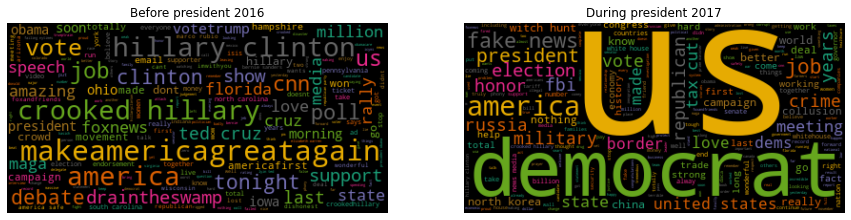

In [19]:
update_stop_words = STOPWORDS.union({'S','U','big','much','time','want','many','done','one','Trump',
                                     'back','said','see','need','great','people','thank','American',
                                    'must','don t', 'good', 'going','win','even','now','must','don',
                                     'today','join','new','will','never','country','year','better'
                                     'way','bad', 't','make','dem','way','thing','say','day','made'
                                    'last','night','tomorrow','interviewed','watch','look','let'})

#text2016 = text2016.replace('will','')
text2017 = text2017.replace('don t','')
fig, axes = plt.subplots(1,2,squeeze=False,figsize=(15,15))

wordcloud2016 = WordCloud(max_words=400, background_color="black",
                          colormap='Dark2',random_state=72,
                          stopwords = update_stop_words,
                          max_font_size=250).generate(text2016)

wordcloud2017 = WordCloud(max_words=400, background_color="black",
                          colormap='Dark2',random_state=72,
                          stopwords = update_stop_words,
                          max_font_size=200).generate(text2017)

axes[0][0].imshow(wordcloud2016, interpolation='bilinear')
axes[0][1].imshow(wordcloud2017, interpolation='bilinear')
axes[0][0].title.set_text('Before president 2016')
axes[0][1].title.set_text('During president 2017')
#axes[0][0].axis("off")
#axes[0][0].title('2016 before president')
axes[0][0].axis('off')
axes[0][1].axis('off')
plt.show()

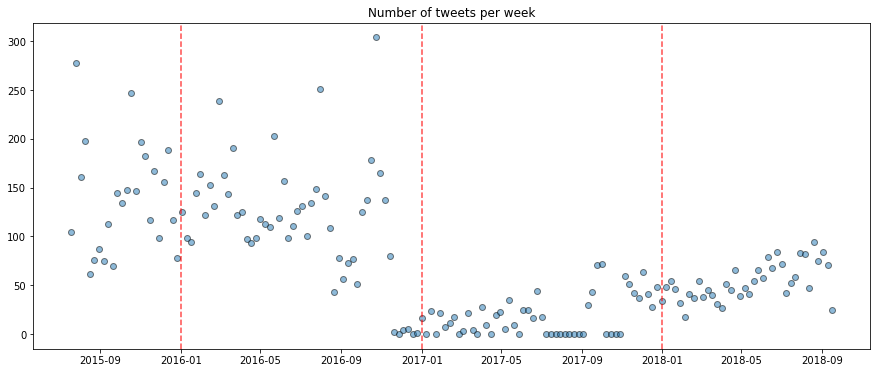

In [20]:
import numpy as np
import matplotlib.dates as mdates

df_merged['Date'] = pd.to_datetime(df_merged['Date'])
twts_day = df_merged.groupby(pd.Grouper(key='Date',freq='W')).count()['Text']
#twts_day.loc[twts_day.index >='2016-01-01' & twts_day.index <='201-01-01']
plt.figure(figsize=(15,6))
#plt.xticks(np.arange(min(twts_day), max(twts_day)+1, 1.0))

#ns.scatterplot(x=twts_day.index, y=twts_day.values, data=twts_day)
df_twts_day = pd.DataFrame({'date': twts_day.index,
                            'tweets': twts_day.values},
                            columns=['date','tweets'])

#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)

plt.scatter(x=df_twts_day['date'],y=df_twts_day['tweets'],alpha=0.5,edgecolor='black')

plt.axvline(x='2016-01-01',ls='--',color='red',alpha=0.7)
plt.axvline(x='2017-01-01',ls='--',color='red',alpha=0.7)
plt.axvline(x='2018-01-01',ls='--',color='red',alpha=0.7)
plt.title('Number of tweets per week')
plt.show()


In [21]:
import datetime

def categorise_time(time):
    
    if  0<=  int(time.hour) <4:
        return "00am - 04am"
    if  4<=  int(time.hour) <8:
        return "04am - 08am"
    if  8<=  int(time.hour) <12:
        return "08am - 12pm"
    if  16<=  int(time.hour) <20:
        return "16pm - 20pm"
    else:
        return "20pm - 00am"
    
    
df_merged['time1'] = pd.to_datetime(df_merged['Time'])

df_merged['cat'] = df_merged.apply(lambda x: categorise_time(x['time1']),axis=1).copy()
df_merged.head()

,index,Date,Time,Text,Year,time1,cat
0,0,2016-11-11,15:26:37,today we express our deepest gratitude to all ...,2016,2020-12-07 15:26:37,20pm - 00am
1,1,2016-11-11,13:33:35,busy day planned in new york will soon be maki...,2016,2020-12-07 13:33:35,20pm - 00am
2,2,2016-11-11,11:14:20,love the fact that the small groups of protest...,2016,2020-12-07 11:14:20,08am - 12pm
3,3,2016-11-11,02:19:44,just had a very open and successful presidenti...,2016,2020-12-07 02:19:44,00am - 04am
4,4,2016-11-11,02:10:46,a fantastic day in dc met with president obama...,2016,2020-12-07 02:10:46,00am - 04am


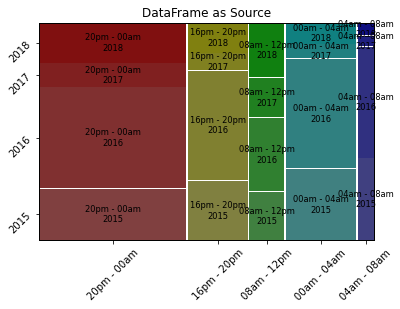

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
df_merged_sorted = df_merged.sort_values(by='Year',ascending=True)
mosaic(df_merged_sorted, ['cat','Year'], title='DataFrame as Source',gap=0.005,horizontal=True,label_rotation=45)

plt.show()

In [ ]:
#df_merged['Text1'] = df_merged.apply(lambda x: cleaning_round1(str(x['Text'])), axis=1)
#df_merged['Text1'] = df_merged.apply(lambda x: cleaning_round2(str(x['Text'])), axis=1)

for text in df_merged['Text']:
    print(text)

today we express our deepest gratitude to all those who have served in our armed forces #thankavet 
busy day planned in new york will soon be making some very important decisions on the people who will be running our government
love the fact that the small groups of protesters last night have passion for our great country we will all come together and be proud
just had a very open and successful presidential election now professional protesters incited by the media are protesting very unfair
a fantastic day in dc met with president obama for first time really good meeting great chemistry melania liked mrs o a lot
happy  birthday to the us marine corps thank you for your service 
such a beautiful and important evening the forgotten man and woman will never be forgotten again we will all come together as never before
watching the returns at  #electionnight #maga 



still time to #votetrump #ivoted #electionnight 
dont let up keep getting out to vote  this election is far from over we ar

In [ ]:
pol = []
sub = []
for i, text in enumerate(test['Text']):
    pol.append(TextBlob(text).sentiment[0])
    sub.append(TextBlob(text).sentiment[1])


In [ ]:
df_sentiment = pd.DataFrame({'polarity':pol,
                         'subjectivity':sub})

# Concatenate the two dataframes into one
df = pd.concat([test,df_sentiment], axis=1)
df.sort_values(by='Date',inplace=True)
df.head()